# Improving the accuracy of the ANN(Artificial Neural Network)
## Early Stopping

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from mlxtend.plotting import plot_decision_regions
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from pylab import rcParams


In [3]:
x, y = make_circles(n_samples=100, noise=0.1, random_state=1)

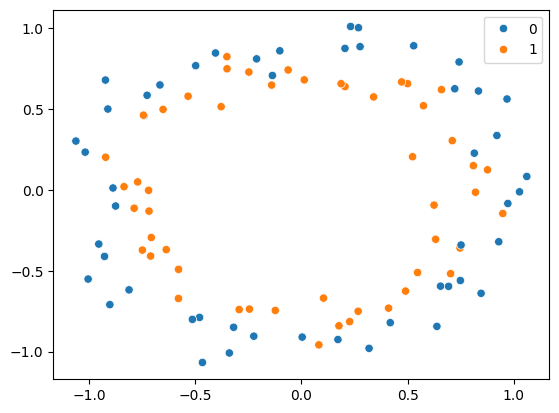

In [4]:
sns.scatterplot(x=x[:,0], y=x[:,1], hue=y)
plt.show()

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

f:\Windows 10\Python Files\Data Science\py_venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=50,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [13]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5375 - loss: 0.6689 - val_accuracy: 0.3500 - val_loss: 0.7372
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5375 - loss: 0.6687 - val_accuracy: 0.3500 - val_loss: 0.7391
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5375 - loss: 0.6679 - val_accuracy: 0.3500 - val_loss: 0.7397
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5375 - loss: 0.6673 - val_accuracy: 0.3500 - val_loss: 0.7404
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5375 - loss: 0.6667 - val_accuracy: 0.3500 - val_loss: 0.7406
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5375 - loss: 0.6662 - val_accuracy: 0.3500 - val_loss: 0.7401
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5375 - loss: 0.6656 - val_accuracy: 0.3500 - val_loss: 0.7399
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5375 - loss: 0.6650 - val_accuracy: 0.3500 - v

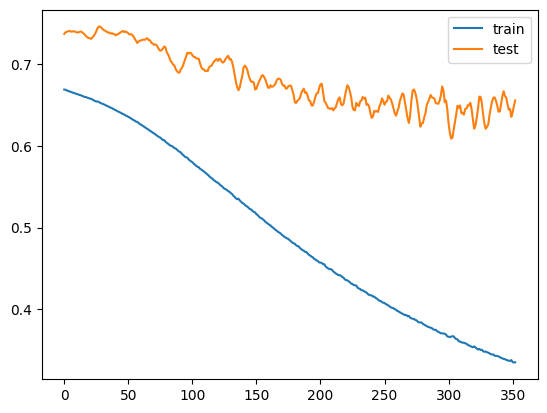

In [14]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 8s 850us/step


<Axes: >

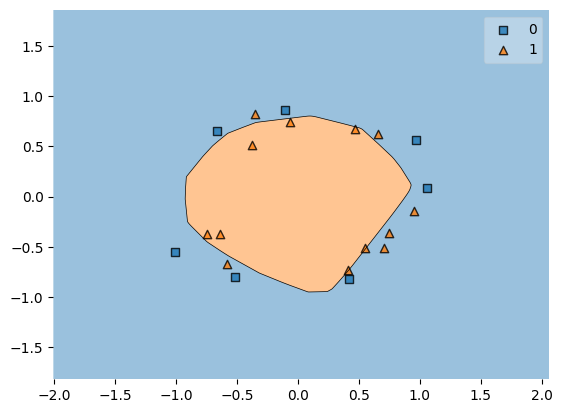

In [15]:
plot_decision_regions(x_test, y_test, clf=model)
plt.show()